# 2017년 케글러를 대상으로 한 설문조사

### 데이터 파일 설명

In [1]:
'''
        < 데이터 파일 >
    1. schema.csv - 설문 스카미가 있는 csv 파일, 
            multipleChoiceResponse.csv 및 freeformResponses.csv 각 열 이름에 해당하는 질문이 포함되어 있다.
        
    2. multipleChoiceResponses.csv  -  객관식 및 순위 질문에 대한 응답자의 답변, 각행이 응답자의 응답

    3. freeformResponses.csv  -  kaggle 설문조사 질문에 대한 응답자의 주관적 답변
                        
                                # 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음

    4. conversionRates.csv R패키지 quantmod 에서 2017년 9월 14일에 엑세스한 USD 변환율

    5. RespondentTypeREADME.txt  -  schema.csv 파일의 Asked 열에 응답하는 디코딩 스키마

'''
%matplotlib inline
import pandas as pd# read_csv, DataFrame, 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns# countplot

import warnings
warnings.filterwarnings('ignore')# notebook에 warning이 보이지 않도록 ignore 처리


In [2]:
question = pd.read_csv('data/schema.csv')# schema.csv 파일에 질문 데이터들이 존재하므로 이들을 가져옴
question.shape# 주어진 data들이 몇행 몇열인지 출력 이경우 290x3

(290, 3)

In [3]:
question.head()# 가장 상위에 있는 default값은 5개, 괄호안에 숫자를 정하면 숫자만큼 출력됨.

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail(10)# 가장 하위에 있는 default값은 5개, 괄호안에 숫자를 정하면 숫자만큼 출력됨.

,Column,Question,Asked
280,JobFactorExperienceLevel,How are you assessing potential job opportunit...,Learners
281,JobFactorDepartment,How are you assessing potential job opportunit...,Learners
282,JobFactorTitle,How are you assessing potential job opportunit...,Learners
283,JobFactorCompanyFunding,How are you assessing potential job opportunit...,Learners
284,JobFactorImpact,How are you assessing potential job opportunit...,Learners
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
# pandas 로 객관식(MultipleChoiceResponse) 에 대한 응답을 가져옴 줄여서 mcq
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding = 'ISO-8859-1', low_memory = False)# 파일안에 내용들의 형식이 다른 부분이 있어서 이를 통일시키기 위해 부가설정
mcq.shape
# 16716명이 응답 수 , 228개의 문항 으로 구성됨

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head(10)# NaN 이 많은 부분이 많음을 주목할 것, 객관식이기 때문에 당연한 부분, 내가 체크하지 않은 부분은 자동으로 NaN, 이 부분을 나중에 어떻게 처리할 지도 생각
# NaN 이 무엇을 의미하는가 ? -> 이 mcq 는 객관식 문항에 대한 응답이다. 응답자의 직업이 해당 객관식의 보기와 다르면 체크하지 않으므로 NaN이다.

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

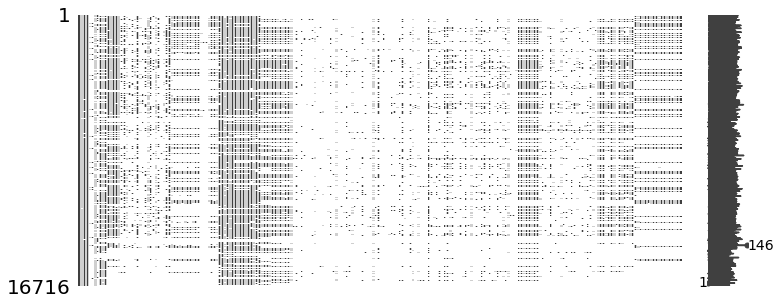

In [8]:
import missingno as mino
# NaN 부분을 시각화 -> 알 수 있는 부분 : 응답하지 않은 질문들이 많다.
# missingno 라이브러리는 추가적으로 import 해야한다. ->  anaconda prompt 에서 conda install -c conda-forge missingno  를 입력해서 설치해야한다.
mino.matrix(mcq, figsize = (12, 5))

## 설문 통계 

### 1. 성별

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

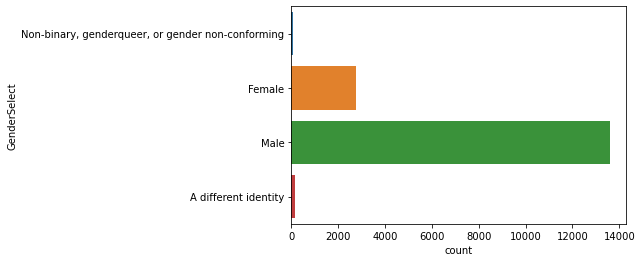

In [9]:
sns.countplot(y='GenderSelect', data = mcq)
# 여성과 남성의 비율 시각화, 남성의 비율이 훨씬 많음이 잘 보임

### 2. 국가별 응답수

In [10]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df) # 이렇게 출력하면 가시성이 좋지 않아서, index, 응답수, 국가 로 DataFrame 수정
con_df['국가'] =  con_df.index
con_df.columns = ['응답 수', '국가']
con_df = con_df.reset_index().drop('index', axis = 1)
con_df

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


### 3. 나이 및 연령

In [11]:
# 연령에 대한 정보  전체 응답수, 평균값, 표준편차, 최소값........
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

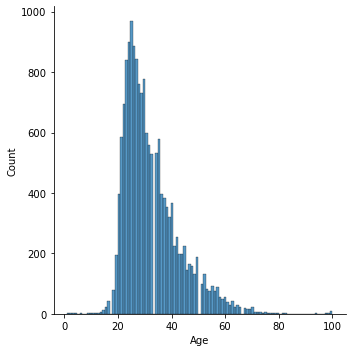

In [12]:
# 나이에 대한 시각화
sns.displot(mcq[mcq['Age'] > 0]['Age'])
#20대 중반부터 많고, 30대가 가장 많다

### 4. 학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

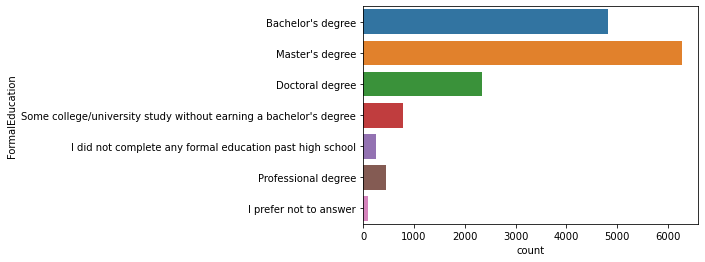

In [13]:
sns.countplot(y = 'FormalEducation', data = mcq)
# 학사 학위를 가진 사람보다 석사학위를 가진 사람이 더많다. 박사학위를 가진사람도 꽤 많다.

### 5. 전공

In [14]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))# normalize = True 로 비율을 구할 수 있다.
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)# merge로 합침
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df
# 컴공 >> 수학과 > 공대 >......

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

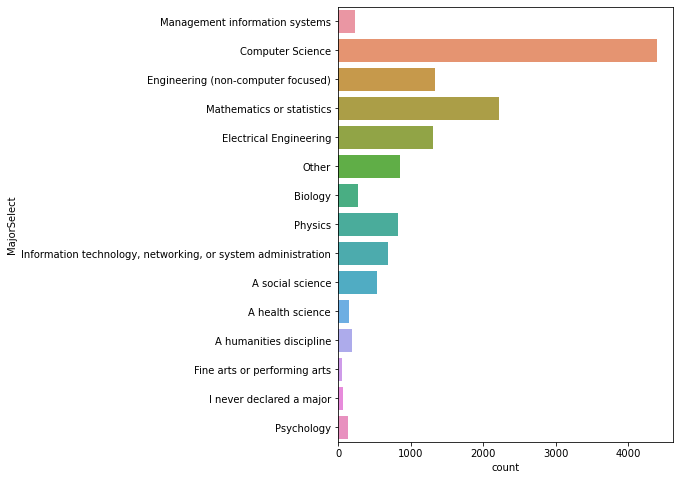

In [15]:
# 전공 분포를 시각화
plt.figure(figsize = (6, 8))
sns.countplot(y = 'MajorSelect', data = mcq)

### 6. 취업 여부

In [16]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

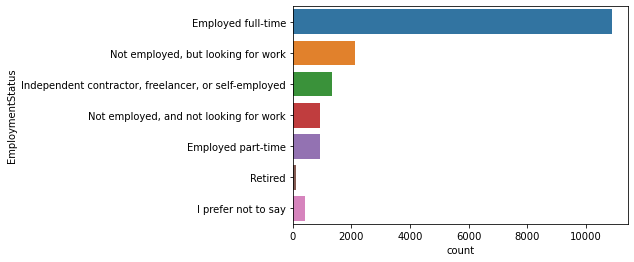

In [17]:
# 취업 여부를 시각화
sns.countplot(y = 'EmploymentStatus', data = mcq)
# 풀타임 일하는 사람이 65% 정도, 구직중이 12%정도, 프리랜서가 7% 정도, .....

### 7. 프로그래밍 경험

<AxesSubplot:xlabel='count', ylabel='Tenure'>

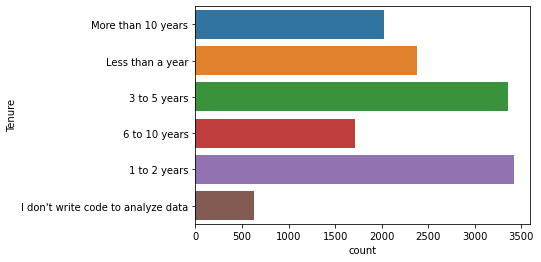

In [18]:
# Tenure = Data Science 분야에서 코딩 경험이 얼마나 되는지에 대한 질문
sns.countplot(y = 'Tenure', data = mcq)
# 대부분 5년 이하이며, 1~2년, 3~5년순으로 많다.
# 대학교 고학년부터 접한 사람이 많다는 결론을 내릴 수 있다. ( 나이 및 연령에 대한 분석과 함께 도출)

#### 7-1. 한국 설문자들의 프로그래밍 경험에 대한 분석

The number of interviewees in Korea : 194


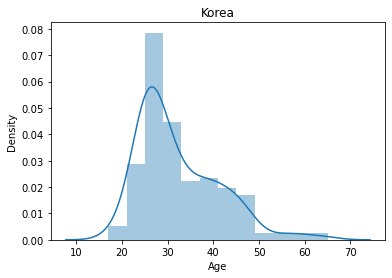

In [19]:
# 위의 프로그래밍 경험을 우리나라 설문자대상으로 좁혀본다면
korea = mcq.loc[ (mcq['Country'] == 'South Korea')]
print('The number of interviewees in Korea : '+str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Korea')
plt.show()
# 194명의 우리나라 사람이 인터뷰에 응했고, 20대 중반의 사람들이 가장 많았다.

In [20]:
# 7-1을 성별 부분으로 본다면
pd.DataFrame(korea['GenderSelect'].value_counts())
# 남성이 여성보다 훨씬 많다.

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

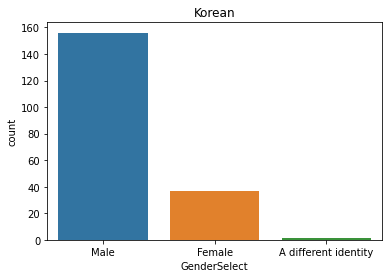

In [21]:
# 위를 시각화
sns.countplot(x = 'GenderSelect', data = korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

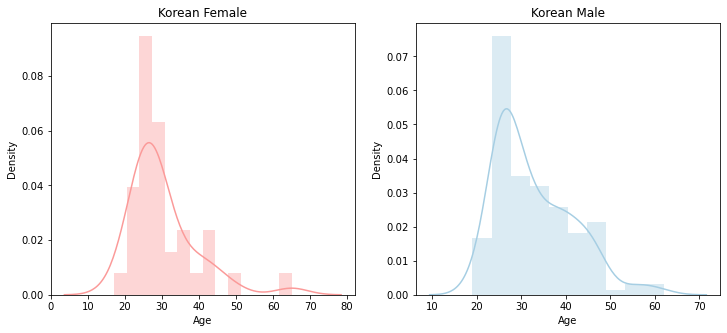

In [22]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)# subplots(x,y) 로 x행 y열로 쪼갤 수 있음
figure.set_size_inches(12, 5)

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(), 
             norm_hist = False, color = sns.color_palette("Paired")[4], ax = ax1)
ax1.set_title('Korean Female')
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == "Male"].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
ax2.set_title('Korean Male')


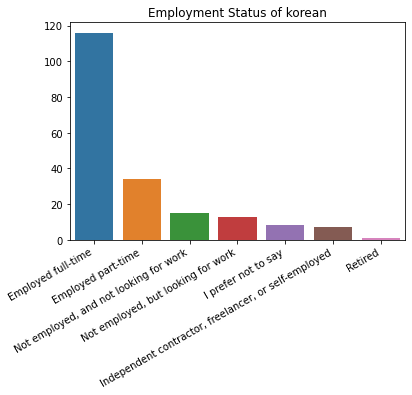

In [23]:
# 취업 여부
sns.barplot(x = korea['EmploymentStatus'].unique(), y = korea['EmploymentStatus'].value_counts())
plt.xticks(rotation = 30, ha = 'right')# 현재 x범주의 취업여부에 대한 영어 글자수가 많으므로 회전시켜서 가시성을 높인다.
plt.title('Employment Status of korean')
plt.ylabel(' ')
plt.show()

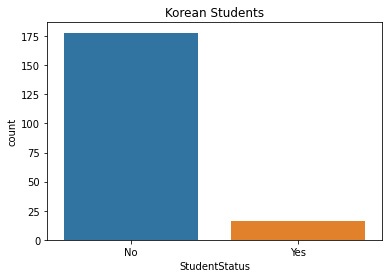

In [24]:
# 학생 여부
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x = 'StudentStatus', data = korea)
plt.title('Korean Students')
plt.show()
# 일한다고 응답한 사람이 많으므로, 당연히 학생수가 적다

### Q1. Python vs R

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

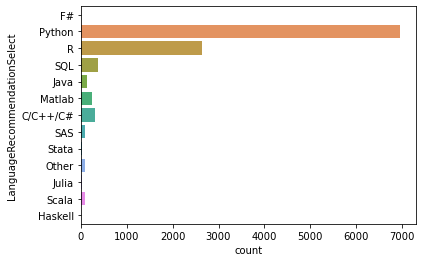

In [25]:
sns.countplot(y = 'LanguageRecommendationSelect', data = mcq)
# Python 사용자가 압도적으로 많고 R, SQL,java....
# Python이 확실하게 선호됨을 알 수 있다.

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

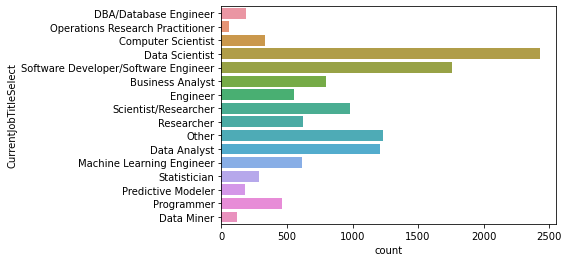

In [26]:
# 현재 하고 있는 일
sns.countplot(y = mcq['CurrentJobTitleSelect'])

In [27]:
# 현재 하고 있는 일에 대한 전체 응답수 = 11830
mcq[ mcq[ 'CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

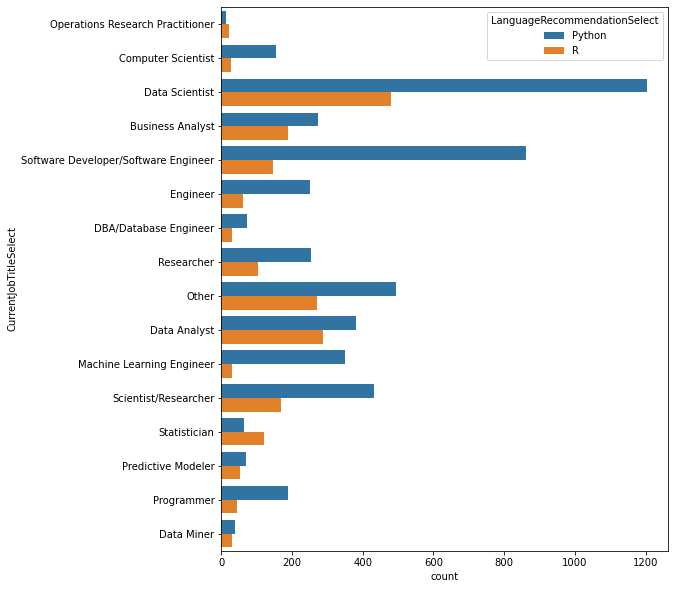

In [28]:
# 위의 11830 명중 Python 과 R을 사용하는 사람들은 얼마나 있는가?
data = mcq[ (mcq['CurrentJobTitleSelect'].notnull()) &
( (mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize = (8, 10))
sns.countplot(y = 'CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect', data = data)
# Python사용자 7158명, R사용자 228명
# 직업 부분에서는 Operation Research Practitioner(운영 연구 실무자), Statistician(통계학자)를 제외하고 모두 파이썬이 더 많다.
# 결론 : 파이썬을 사용하는 사람들이 훨씬 많고, 실무자들도 파이썬을 훨씬 더 많이 사용한다.

### Q2. 데이터사이언스 분야에서 앞으로 주목받을만한 분야는 어떤 것이 있을까? 

In [29]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize = True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index = True, right_index = True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df
# Google의 텐서플로우가 가장 비율이 높다

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

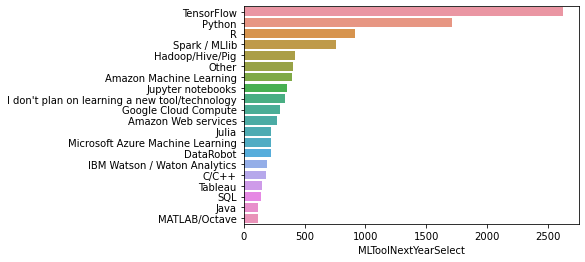

In [30]:
# 위를 시각화
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y= data.index, x = data)
# 텐서플로우 - 파이썬 - R - 머신러닝 라이브러리 ....

### Q 2-1) 내년에 주목할만한 Data Science Methods

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

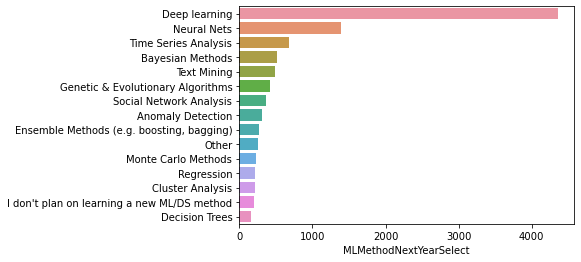

In [31]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y = data.index, x = data)

In [32]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


### Q3. 어디에서 데이터 사이언스를 배워야할까??

In [33]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

<AxesSubplot:xlabel='platform'>

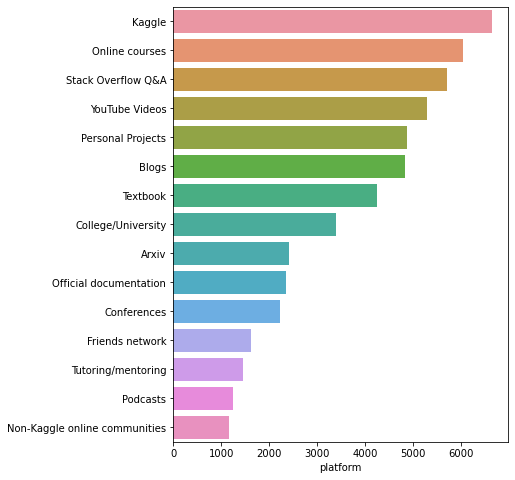

In [34]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

#### 위 그래프를 통해 알 수 있는것  
- Kaggle이 응답자들 사이에서 인기있는 플랫폼이다
- 하지만 이 설문을 Kaggle에서 진행했으므로 신빙성이 크지는 못하다.  
- 온라인 코스, 스택 오버플로우, 유튜브 같은 학습 플랫폼이 대학에서 배우는 내용보다 더 선호되고, 중요하다고 느낀다.
- 오픈소스의 힘

In [35]:
# 아래 표에서 Column은 질문의 대상, Question은 대상에게 한 질문
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [36]:
use_features = [ x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1 ]

<AxesSubplot:>

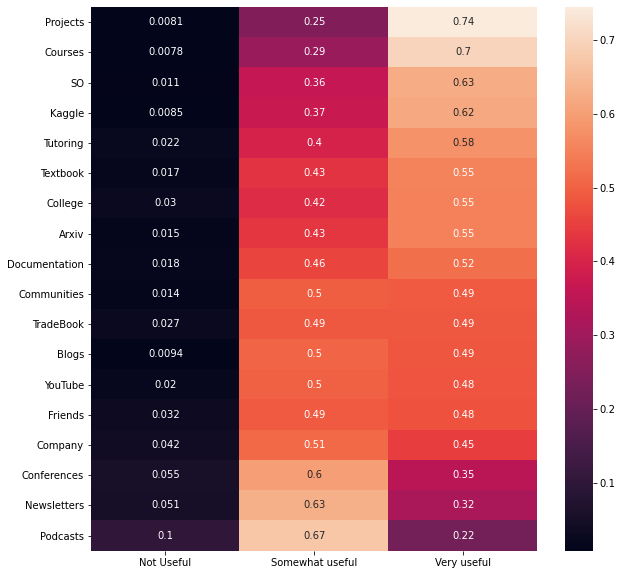

In [37]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(# heatmap을 통해 시각화, 1에 가까울수록 가장 유용한것
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

<AxesSubplot:title={'center':'Usefulness of Learning Platform'}>

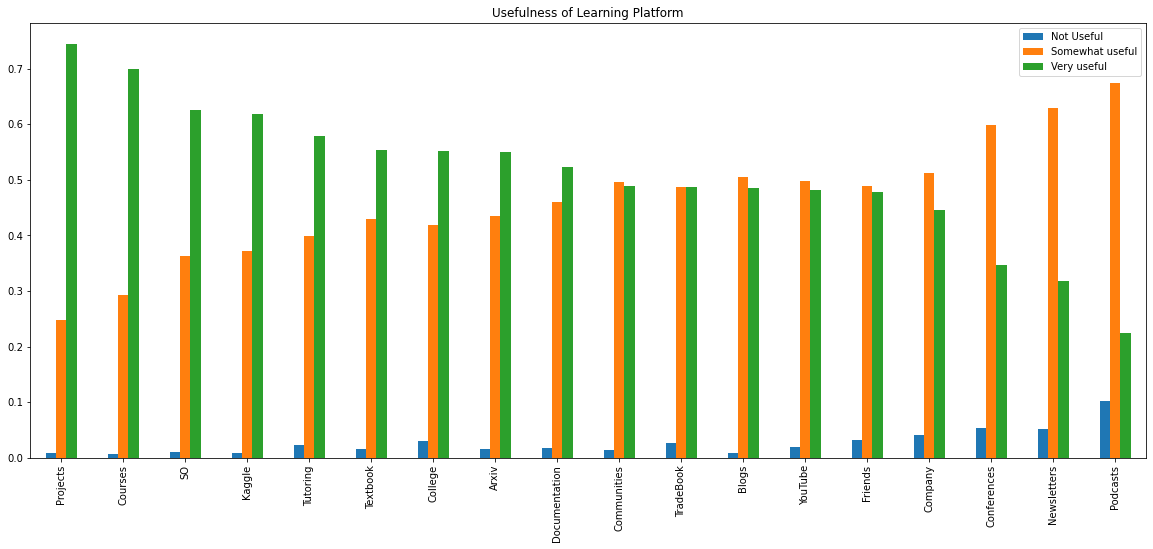

In [38]:
fdf.plot(kind = 'bar', figsize = (20, 8), title = 'Usefulness of Learning Platform')
# 위의 히트맵을 아래는 그래프로 표현# 위의 히트맵을 아래는 그래프로 표현
# 74.7%의 응답자가 유용하다 라고 답변, SO = StackOverflow

In [39]:
cat_features = [ x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features
# 학습 카테고리에 대한 질문들

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [40]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
cdf = pd.Series(cdf)
cdf
# 자습 33% , 온라인 강의 27%, 대학교 17%, 직장 15%, 케글 5%

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

#### 학습 플랫폼 별로 도움이 되는 정도를 알아본다면

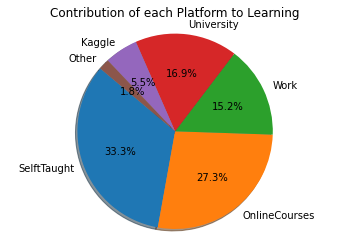

In [41]:
plt.pie(cdf, labels = cdf.index, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()
# 파이차트로 보여주는것이 서로 비교하기에 쉽다고 판단하여 사용, 참고로 seaborn은 파이차트가 없다.
# 따라서 파이차트는 matplotlib 사용. 

#### 개인프로젝트를 하는것이 가장 많은 도움이 되었고 , 온라인강의, 대학, 업무 순서로 도움이 된다고 응답하였다.


### Q4. 데이터 사이언스 공부에 얼마나 많은 시간을 투자하는가??

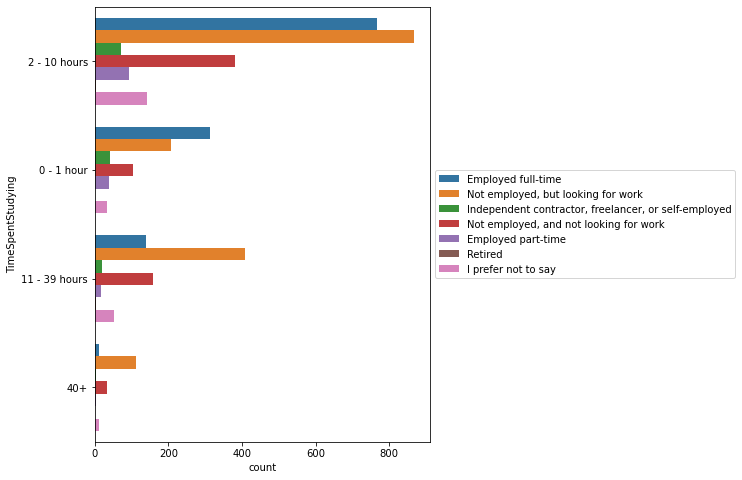

In [42]:
plt.figure(figsize = (6, 8))
sns.countplot(y = 'TimeSpentStudying', data = mcq, hue = "EmploymentStatus").legend(loc = "center left", bbox_to_anchor = (1, 0.5))

#### 풀타임으로 일하는 사람들은 하루에 약 2 ~ 10시간 일하는 비율이 높았다.
#### 풀타임으로 일하는 사람보다 구직중인 사람이 공부에 투자하는 시간이 더 많다.(당연한 부분)
#### 하지만 응답자중 대부분이 풀타임으로 일하는 것을 고려해서 분석할 필요가 있다.

### Q5. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [43]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [44]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [45]:
s = s[s != 'nan'].value_counts().head(20)

<AxesSubplot:title={'center':'Most Popular Blogs and Podcasts'}, xlabel='platforms'>

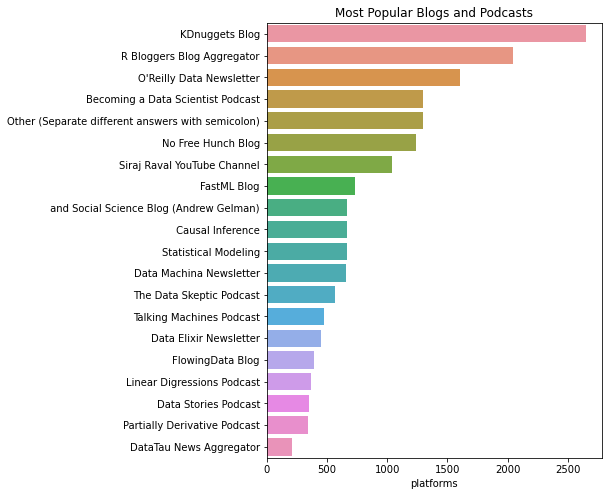

In [46]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

#### KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter 가 가장 유용하다고 투표를 받았다. 데이터 사이언스 되기라는 팟캐스트도 유명한 듯 하다.

In [47]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [48]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [49]:
t = t[t != 'nan'].value_counts()

<AxesSubplot:title={'center':'Most Popular Course Platforms'}, xlabel='courses'>

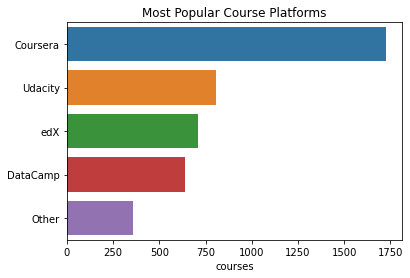

In [50]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

#### Coursera 와 Udacity 가 가장 인기있는 플랫폼이다.

### Q6. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [51]:
job_features = [
    x for x in mcq.columns if x.find(
        'JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [52]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [53]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


<AxesSubplot:>

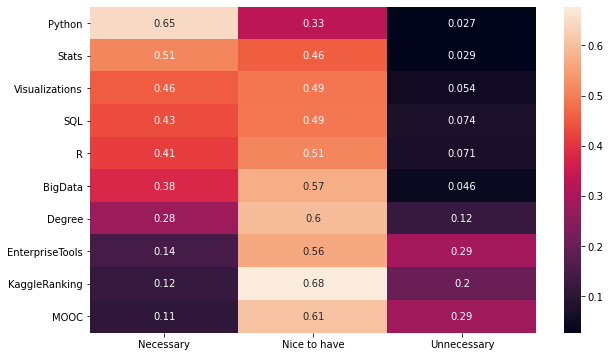

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", 
                            ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BigData'),
  Text(1, 0, 'Degree'),
  Text(2, 0, 'Stats'),
  Text(3, 0, 'EnterpriseTools'),
  Text(4, 0, 'Python'),
  Text(5, 0, 'R'),
  Text(6, 0, 'SQL'),
  Text(7, 0, 'KaggleRanking'),
  Text(8, 0, 'MOOC'),
  Text(9, 0, 'Visualizations')])

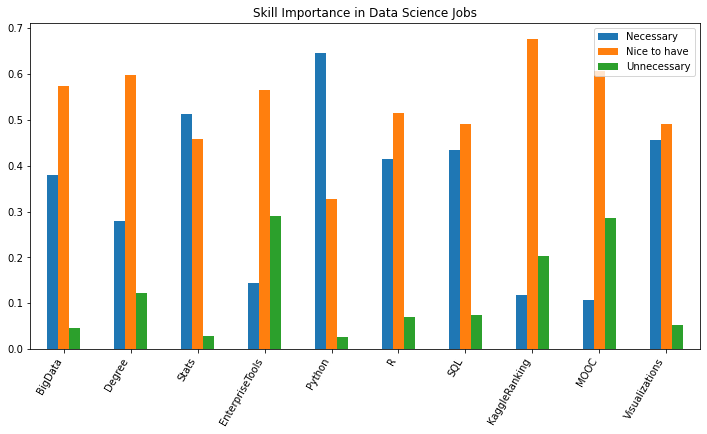

In [55]:
jdf.plot(kind='bar', figsize=(12,6), 
         title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

#### 꼭 필요한 스킼로 Python , R , 통계 , 시각화 가 있다.
#### 있으면 좋은 것으로는 빅데이터, 학위, 툴 사용법, 케글랭킹, 무크 가 있다.

### Q7. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [65]:
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



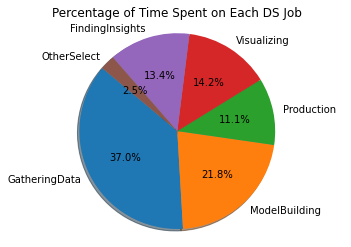

In [66]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

#### 데이터를 수집하는 일이 37%로 업무의 가장 큰 비중을 차지하고 그 다음으로 모델을 구축하고 시각화, 인사이트를 찾는 순이다.

### Q8. 데이터사이언스 직업을 찾을때, 고려해야할 요소는 무엇이 있는가?

In [68]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [69]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]

<AxesSubplot:>

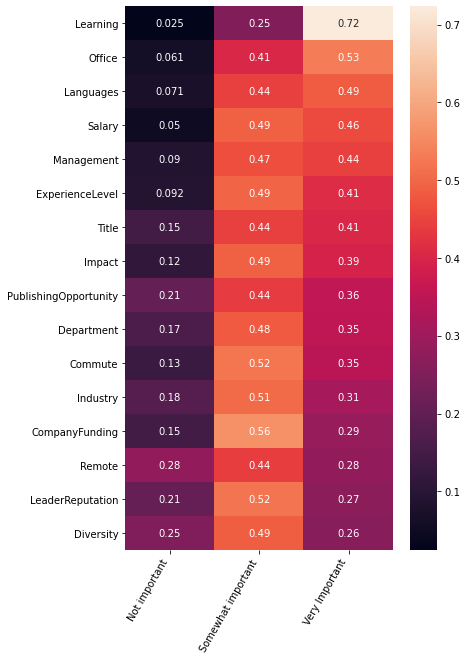

In [70]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

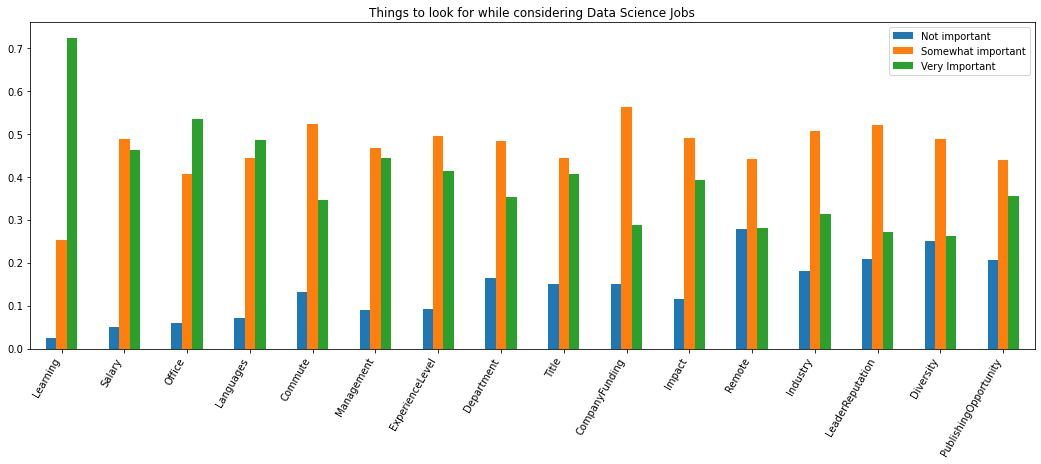

In [71]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

#### 데이터 사이언티스트로 직업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크나 언어, 급여, 경영상태, 경력정도 순이다

### Q9. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

<AxesSubplot:xlabel='count', ylabel='UniversityImportance'>

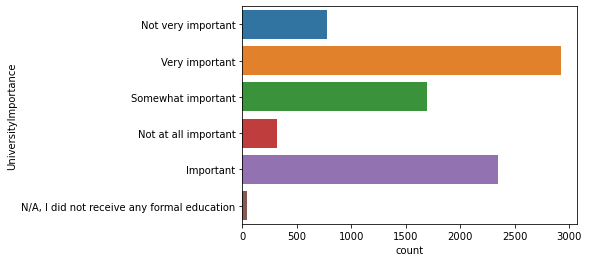

In [72]:
sns.countplot(y='UniversityImportance', data=mcq)


#### 마치 연령대 그래프를 찍어 본것과 같은 형태의 그래프다. 
#### 20~30대는 대학 학위가 매우 중요하다고 생각하며, 연령대가 높은 응답자들은 그다지 중요하지 않다고 응답했다. 300명 미만의 응답자만이 학위가 중요하지 않다고 생각한다.

#### 대부분의 응답자가 석사와 박사인 것을 고려해 봤을 때 이는 자연스러운 응답이다.

### Q10. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [74]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

<AxesSubplot:xlabel='count', ylabel='FirstTrainingSelect'>

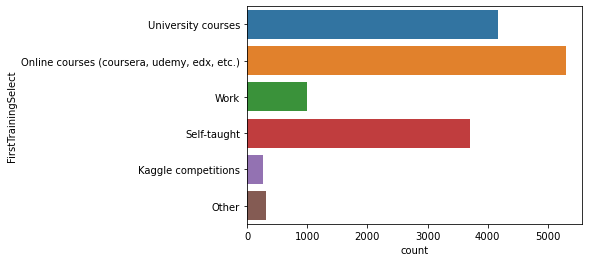

In [75]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

#### 대부분의 응답자가 학사학위 이상으로 대학교육에 대한 중요성을 부여했지만, 가장 많은 응답자가 코세라, 유데미와 같은 온라인 코스를 통해 데이터 사이언스를 공부했고 그 다음으로 대학교육이 차지하고 있다.

#### 개인프로젝트를 해보는 것도 중요하다고 답한 응답자가 제법 된다.

#### 종합) 온라인 강의를 수강하여 기초지식을 쌓고, 개인프로젝트로 실력을 다듬는것이 최선의 방법이다.

### Q11. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

<AxesSubplot:xlabel='count', ylabel='ProveKnowledgeSelect'>

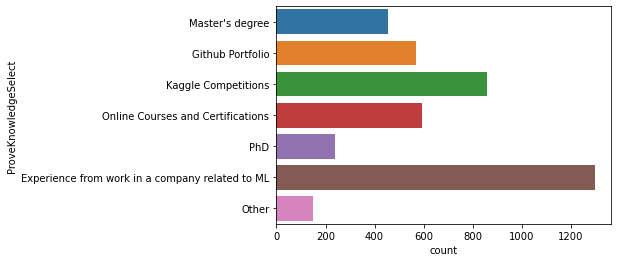

In [76]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

#### 머신러닝과 관련 된 직무경험이 가장 중요하고 다음으로 캐글 경진대회의 결과가 중요하다고 답했다. 
#### 그리고 온라인 강좌의 수료증이나 깃헙 포트폴리오 순으로 중요하다고 답했다

### Q12. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [77]:
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [78]:

mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

<AxesSubplot:xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

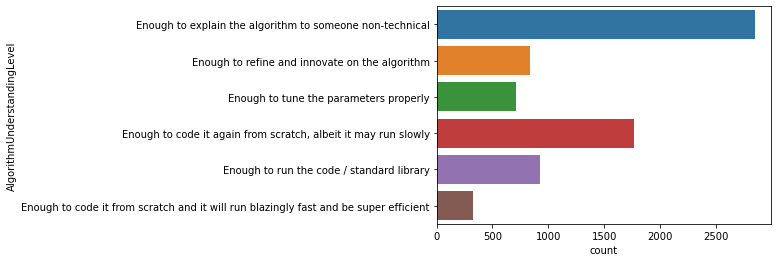

In [79]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

#### 현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다는 응답이 그 뒤를 잇는다.

### 결론 및 느낀점
- 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
- 하지만 Python과 R을 모두 사용하는 사람도 많다.
- 데이터 수집과 정제는 어려운 일이다.(공감)
- 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
- 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.
- 전공자들은 온라인 강의와 개인 프로젝트를 통한 실력향상을 가장 중요하게 생각한다.